# Accessing the KEGG database

In [1]:
import biu as biu
import matplotlib.pylab as plt

where = '/exports/molepi/tgehrmann/data/'
biu.config.settings.setWhere(where)

kegg = biu.db.KEGG()
hms = biu.maps.HumanS()

D: Initializing the SQLiteResourceManager object NOW


In [2]:
print(kegg)

KEGG object
 Version: human
 Objects:
  * [ ] _orgMap
  * [ ] _featureData
 Files:
  * [X] org_map : /exports/molepi/tgehrmann/data/kegg_human/org_map.tsv
  * [X] feature_data : /exports/molepi/tgehrmann/data/kegg_human/feature_data.dict.sqlite



## Get a list of pathways and genes

In [3]:
print("Number of pathways: %d" % len(kegg.getPathways()))
print("Number of genes: %d" % len(kegg.getGenes()))

/exports/molepi/tgehrmann/data/_downloads/6bd39936ced8f7d59c4b10e795594718d4425360
0
0
/exports/molepi/tgehrmann/data/kegg_human/org_map.tsv
Number of pathways: 328
Number of genes: 7430


D: /exports/molepi/tgehrmann/data/_downloads
D: 6bd39936ced8f7d59c4b10e795594718d4425360
D: 
D: Loading the index from pickle


## Get the pathways that a specific gene is in
Look up with the geneID

In [4]:
print("Number of pathways MTOR is in: %d" % len(kegg.getGenePathways(hms.getSymbolGeneID("MTOR")[0])))

Number of pathways MTOR is in: 37


## Get the genes in a pathway
Lookup with KEGG pathway ID

In [5]:
print("Number of genes in path:hsa05230: %d" % len(kegg.getPathwayGenes("path:hsa05230")))

Number of genes in path:hsa05230: 65


## Get information about a specific KEGG pathway

In [6]:
print(kegg.getPathwayInfo("hsa04740").split('\n')[1][4:].strip())

0


D: Downloading via REST from 'http://rest.kegg.jp/get/path:hsa04740'


Olfactory transduction - Homo sapiens (human)


## Perform an enrichment analysis with KEGG

If you have a gene set, you can easily perform an enrichment on this geneset with the enrich function
You can also specify a specific subset of pathways to test using the `pathways=[]` option.

In [7]:
myGeneSet = kegg.getPathwayGeneIDs("hsa04740")
enrichRes = kegg.enrich(myGeneSet, correctionType='bonferroni')
enrichRes[enrichRes.q < 0.05].sort_values("q")

,pathway,method,c2statistic,oddsratio,p,q
44,path:hsa04740,fisher,NaN,inf,0.000000e+00,0.000000e+00
33,path:hsa04744,chi2,42.269287,100.000000,7.953179e-11,7.714583e-09
91,path:hsa04713,chi2,39.350698,100.000000,3.541262e-10,3.435024e-08
45,path:hsa04924,chi2,28.208951,100.000000,1.088998e-07,1.056328e-05
29,path:hsa04720,chi2,26.750044,100.000000,2.315465e-07,2.246001e-05
65,path:hsa04971,chi2,26.700155,100.000000,2.376024e-07,2.304743e-05
54,path:hsa05031,chi2,26.055310,100.000000,3.317752e-07,3.218219e-05
20,path:hsa04151,fisher,NaN,0.137660,2.621877e-06,2.543221e-04
86,path:hsa04925,chi2,20.175377,100.000000,7.065662e-06,6.853692e-04
13,path:hsa05165,fisher,NaN,0.152789,1.703370e-05,1.652269e-03


## Make a pretty plot

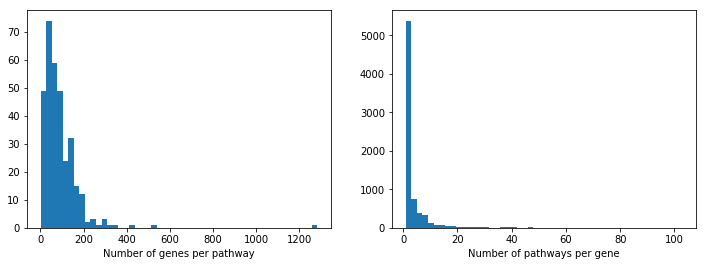

In [8]:
fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()

# How many genes are there per kegg pathway?
genesPerPathway = [ len(kegg.getPathwayGenes(p)) for p in kegg.getPathways() ]
pathwaysPerGene = [ len(kegg.getGenePathways(g)) for g in kegg.getGenes() ]

axes[0].hist(genesPerPathway, bins=50)
axes[0].set_xlabel("Number of genes per pathway")
axes[1].hist(pathwaysPerGene, bins=50)
axes[1].set_xlabel("Number of pathways per gene")
plt.show()